
## Assignment 3:
 Use a *spatial join* to relate data from a population data set to the buffer layer created in *assignment 2* to find out how many people live in all population grid cells that are **within** 1 km distance from each shopping centre in Stockholm 


Load the population layer for Stockholm named 'pop_stockholm.shp' in a geodataframe. Don’t forget to check if the layer is on an appropriate CRS (EPSG 3006, SWEREF99 TM)

In [1]:
import pathlib

# Setup data directory
NOTEBOOK_PATH = pathlib.Path("/geopython/Exercises/Exercise 3")
DATA_DIRECTORY = NOTEBOOK_PATH / "data"

# Setup filepath
filepath_population = DATA_DIRECTORY / "pop_stockholm.shp"
filepath_buffers = DATA_DIRECTORY / "buffers.gpkg"

,fid,RutStorl,Ruta,POP,geometry
0,147.0,1000,6900006558000,3,"POLYGON ((690000.000 6558000.000, 690000.000 6..."
1,261.0,1000,6580006565000,3276,"POLYGON ((658000.000 6565000.000, 658000.000 6..."
2,281.0,1000,6820006564000,686,"POLYGON ((682000.000 6564000.000, 682000.000 6..."
3,291.0,1000,6510006570000,42,"POLYGON ((651000.000 6570000.000, 651000.000 6..."
4,299.0,1000,6520006573000,74,"POLYGON ((652000.000 6573000.000, 652000.000 6..."
...,...,...,...,...,...
1945,114876.0,1000,6810006567000,220,"POLYGON ((681000.000 6567000.000, 681000.000 6..."
1946,114899.0,1000,6880006571000,363,"POLYGON ((688000.000 6571000.000, 688000.000 6..."
1947,114916.0,1000,6570006581000,60,"POLYGON ((657000.000 6581000.000, 657000.000 6..."
1948,114921.0,1000,6510006567000,651,"POLYGON ((651000.000 6567000.000, 651000.000 6..."


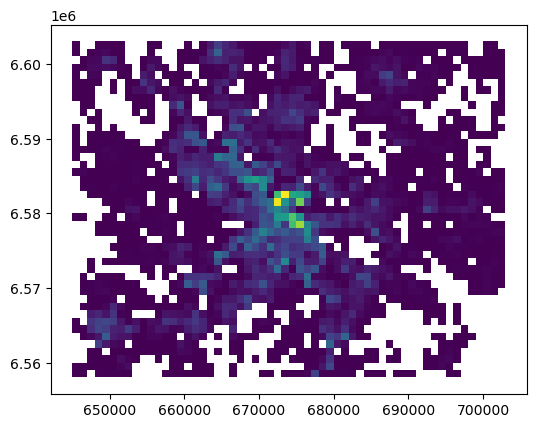

In [2]:
import geopandas as gpd

# Load points from from disk
pop_stockholm = gpd.read_file(filepath_population)

# Ensure the data is in correct crs
if not pop_stockholm.crs == "EPSG:3006":
    pop_stockholm = pop_stockholm.to_crs("EPSG:3006")

pop_stockholm.plot(column="POP")
pop_stockholm

Load the buffers computed in *assignment 2* into a `GeoDataFrame` called `shopping_centre_buffers`. Make sure both layers are in the same CRS

,id,name,addr,address,geometry
0,1,Gallerian,"Hamngatan 37, 111 53 Stockholm","37, Hamngatan, Klara, Norrmalm, Norra innersta...","POLYGON ((676473.725 6581089.637, 676464.094 6..."
1,2,Mall of Scandinavia,"Stjärntorget 2, 169 79 Solna","Westfield Mall of Scandinavia, 2, Stjärntorget...","POLYGON ((672635.567 6585150.741, 672625.936 6..."
2,3,Solna Centrum,"Solnavägen 13, 171 45 Solna","13H, Solnavägen, Västra skogen, Solna Kyrkby, ...","POLYGON ((673741.419 6583122.341, 673731.788 6..."
3,4,Sturegallerian,"Sturegatan 4, 114 35 Stockholm","4, Sturegatan, Villastaden, Östermalm, Norra i...","POLYGON ((676806.152 6581558.512, 676796.522 6..."
4,5,Bergshamra Centrum,"Bergshamravägen 1, 170 72 Solna","Bergshamravägen, Kungshamra, Tivoli, Bergshamr...","POLYGON ((674278.454 6586300.362, 674268.824 6..."
5,6,Kista Galleria,"Hanstavägen 55 F, 164 53 Kista","Matmissionen, 55F, Hanstavägen, Kista, Järva s...","POLYGON ((669039.837 6588778.684, 669030.207 6..."


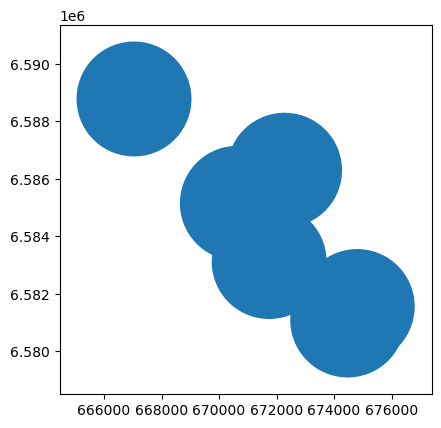

In [3]:
# Load points from from disk
shopping_centre_buffers = gpd.read_file(filepath_buffers)

# Ensure the data is in correct crs
if not shopping_centre_buffers.crs == "EPSG:3006":
    shopping_centre_buffers = shopping_centre_buffers.to_crs("EPSG:3006")

shopping_centre_buffers.plot()
shopping_centre_buffers

In [4]:
assert shopping_centre_buffers.crs == pop_stockholm.crs , "The GeoPandas DataFrames`shopping_centre_buffers` and `pop_stockholm` are different CRS"


Join the shopping centre’s `id` column to the population data frame, for all population grid cells that are **within** the buffer area of each shopping centre. [Use a *join-type* that retains only rows from both input data frames for which the geometric predicate is true](https://geopandas.org/en/stable/gallery/spatial_joins.html#Types-of-spatial-joins). 

In [5]:
# Perform a spatial join between the population df and shopping df, using the `within` predicate
shopping_centers = pop_stockholm.sjoin(
    shopping_centre_buffers, how="right", predicate="within"
)
# shopping_centers

<Axes: >

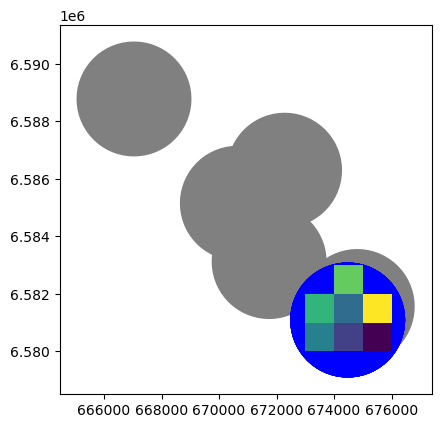

In [6]:
# DEBUG
# Plot population boxes that fit into first buffer zone

axes = shopping_centre_buffers.plot(facecolor="grey", )
shopping_centers.loc[0].plot(ax=axes, color="blue", markersize=5)
pop_stockholm.loc[shopping_centers.loc[0]["index_left"]].plot(ax=axes, column="POP")

Compute the population sum for each shopping center's buffer. Print the results (ie., 'People living in Shopping center named 'XXX' is XX')

In [7]:
# Iterate through all index
for i in shopping_centers.index.unique():
    location = shopping_centers.loc[i]

    # Assert that the names and addresses are unique and there is no mixup
    assert len(location["name"].unique()) == 1 , f"Multiple names for location at index {i}"
    assert len(location["address"].unique()) == 1 , f"Multiple address for location at index {i}"

    print(f"People living in Shopping center named '{location['name'].unique()[0].strip()}' is {location['POP'].sum()}'"  )


People living in Shopping center named 'Gallerian' is 65538'
People living in Shopping center named 'Mall of Scandinavia' is 34980'
People living in Shopping center named 'Solna Centrum' is 30795'
People living in Shopping center named 'Sturegallerian' is 71195'
People living in Shopping center named 'Bergshamra Centrum' is 17082'
People living in Shopping center named 'Kista Galleria' is 22132'


## Comments

I notice that using a buffer zone is a very blunt but an efficient way to measure the population within 1km radius of a point.

Looking at the plot in the debug (`input [7]`), we can see that 7 whole boxes can fit within the circle radius of 2km.

This means using the buffer zone of 2000m is actually too large, and shows a radius greater than 1km from each point.
